<a href="https://colab.research.google.com/github/rexxar280903/DeepLearning/blob/main/01_Neural_Network_Regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# membuat fitur
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# membuat label
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

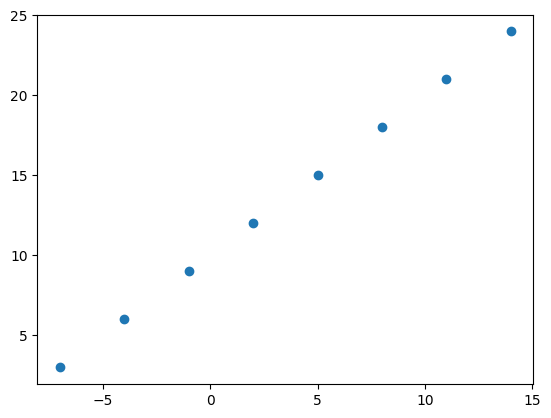

In [ ]:
# visualisasi
plt.scatter(x,y)

In [ ]:
  y == x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# mengubah nparray menjadi tensor
x = tf.constant(x)
x = tf.expand_dims(x, axis=-1)  # Menambahkan dimensi baru pada sumbu terakhir

y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
x.ndim,y.ndim

(2, 1)

## memodelkan dengan tensor
1. **membuat model** - mendefinisikan input dan output layer, sebagaimana layer tersebunyi di model deep learning

2. **compiling model** - mendefinisikan loss fungsi, (fungsi yang memberitahu model kita apa yang salah), dan optimizer, (memberitahu model bagaimana meningkatkan pola pembelajaran) dan mengevaluasi matriks.

3. **fitting model** - membiarkan model mencoba untuk menemukan pola diantara fitur dan label



In [ ]:
# set random seed
tf.random.set_seed(42)

# membuat model menggunakan sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), #stochastic gradient descent
    metrics=["mae"]
)



In [ ]:
# 3. fit model
model.fit(x,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.9725 - mae: 17.9725
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 17.6913 - mae: 17.6913
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 17.4100 - mae: 17.4100
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 17.1288 - mae: 17.1288
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 16.8475 - mae: 16.8475
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 16.5663 - mae: 16.5663
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 16.2850 - mae: 16.2850
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 16.0038 - mae: 16.0038
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 15.7225 - mae: 15.7225
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 15.4413 - mae: 15.4413
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 15.1600 - mae: 15.1600
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 14.8788 - mae: 14.8788
Epoch 13/100
1/1 ━━━

In [ ]:
x,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# prediksi menggunakan model yang sdh dilatih
import numpy as np
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[29.801453]], dtype=float32)

In [ ]:
x, model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 array([[-11.004128  ],
        [ -5.9034305 ],
        [ -0.80273306],
        [  4.2979646 ],
        [  9.398662  ],
        [ 14.499359  ],
        [ 19.600056  ],
        [ 24.700754  ]], dtype=float32))

## meningkatkan model


In [ ]:
#membuat model baru dengan layer tambahan
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)


In [ ]:

model.fit(x,y,epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.7768 - mae: 13.7768
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 13.4569 - mae: 13.4569
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.1536 - mae: 13.1536
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.8682 - mae: 12.8682
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.5877 - mae: 12.5877
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.3068 - mae: 12.3068
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.0197 - mae: 12.0197
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.7378 - mae: 11.7378
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.4576 - mae: 11.4576
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.1729 - mae: 11.1729
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.8794 - mae: 10.8794
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.5771 - mae: 10.5771
Epoch 13/300
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 array([[ 2.863653],
        [ 5.811177],
        [ 8.90277 ],
        [11.923029],
        [14.893468],
        [17.85339 ],
        [20.816788],
        [23.821913]], dtype=float32))

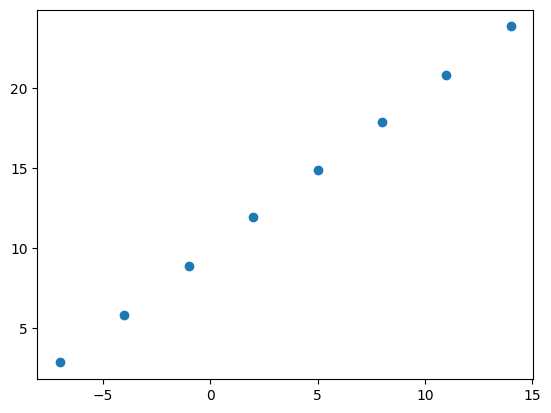

In [ ]:
x,y,plt.scatter(x,model.predict(x)),model.predict(x)

In [ ]:
x,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict(np.array([[19.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[29.051935]], dtype=float32)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
x = tf.range(-100,100,4)
x = tf.expand_dims(x,axis=1)
y = x + 10
x,y

(<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56],
        [  60],
        [  64],
        [  68],
        [  72],
        [  76],
        [  80],
        [  84],
        [  88],
        [  92],
        [  96]], dtype=int32)>,
 <tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70]

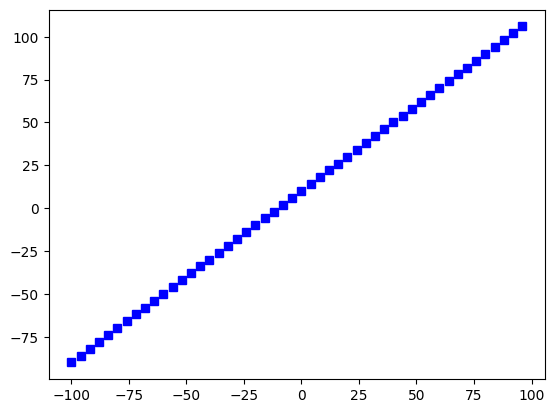

In [ ]:
plt.plot(x,y,'bs')

In [ ]:
# model 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['mae']
)

In [ ]:
model.fit(x,y,epochs=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 133.9015 - mae: 133.9015  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 133.8002 - mae: 133.8002 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 133.6991 - mae: 133.6991 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 133.5979 - mae: 133.5979 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 133.4968 - mae: 133.4968 


In [ ]:
mp = model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


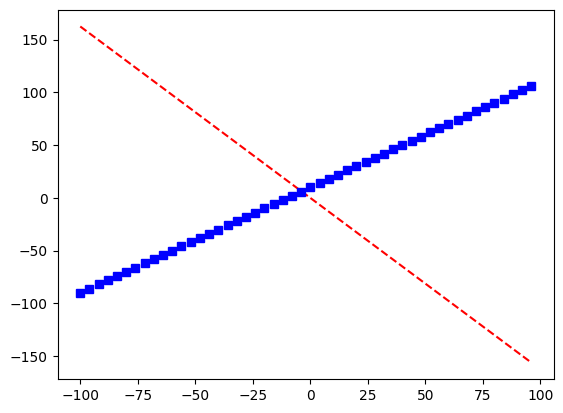

In [ ]:
plt.plot(x,mp,'r--',x,y,'bs')

In [ ]:
# model 1 epoch 100
model.fit(x,y,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 133.3956 - mae: 133.3956
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 133.2945 - mae: 133.2945
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 133.1933 - mae: 133.1933
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 133.0922 - mae: 133.0922
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 132.9910 - mae: 132.9910 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132.8898 - mae: 132.8898 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 132.7887 - mae: 132.7887 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 132.6875 - mae: 132.6875
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 132.5863 - mae: 132.5863
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 132.4851 - mae: 132.4851 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 132.3839 - mae: 132.3839  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 132.2827 - mae: 132.2827  

In [ ]:
m1_e100 = model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


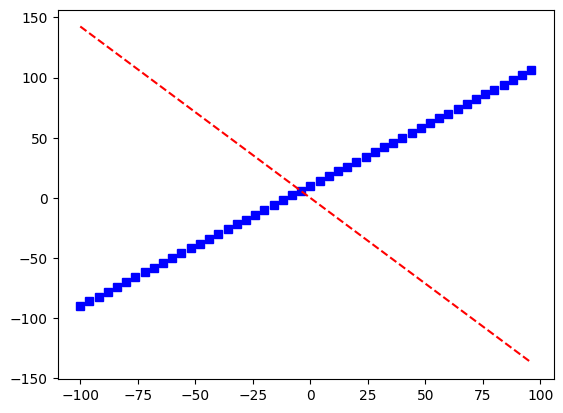

In [ ]:
plt.plot(x,y,'bs',x,m1_e100,'r--')

In [ ]:
# model 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['mae']
)

In [ ]:
x,y

(<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56],
        [  60],
        [  64],
        [  68],
        [  72],
        [  76],
        [  80],
        [  84],
        [  88],
        [  92],
        [  96]], dtype=int32)>,
 <tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70]

In [ ]:
model.fit(x,y,epoch)

NameError: name 'epoch' is not defined